### *Type of RAG evaluations**
- retreival processs
- generation proces if there is hallucaination
- final output

**OUTPUT ACCURACY: STRING EVALUATION**
- the query, model's answere aand reference answere are assigned to compare with the following varibles
- we use the llm answer with the reference answer

In [ ]:
from langchain_groq import ChatGroq
import os

# Don't hard-code secrets in notebooks.
# In PowerShell: $env:GROQ_API_KEY = "..."
# In cmd: set GROQ_API_KEY=...
if not os.getenv("GROQ_API_KEY"):
    raise ValueError("Missing GROQ_API_KEY in environment variables")

llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)

c:\Users\Acer\OneDrive\Documents\code folder\AI\lcenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from langchain_core.prompts import PromptTemplate

prompt_template="""
you are expert professor specialized in grading students' answers to 
correctness.
You are grading the following question:{query}
Here is the real answer:{answer}
You are grading the following predicted answer:{result}
Respond with CORRECT OR INCORRECT:
Grade:"""
prompt=PromptTemplate(
    input_variables=['query','answer','result'],
    template=prompt_template
)
eval_llm=llm

In [ ]:
from langsmith.evaluation import StringEvaluator

qa_evaluator = StringEvaluator(
    criteria="qa",
    llm=eval_llm,
    prompt=prompt
)

score = qa_evaluator.evaluate_strings(
    prediction=predicted_answer,
    reference=ref_answer,
    input=query
)


ValidationError: 1 validation error for StringEvaluator
grading_function
  Field required [type=missing, input_value={'criteria': 'qa', 'llm':...OR INCORRECT:\nGrade:")}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.12/v/missing

### **RAGAS Framework**
- 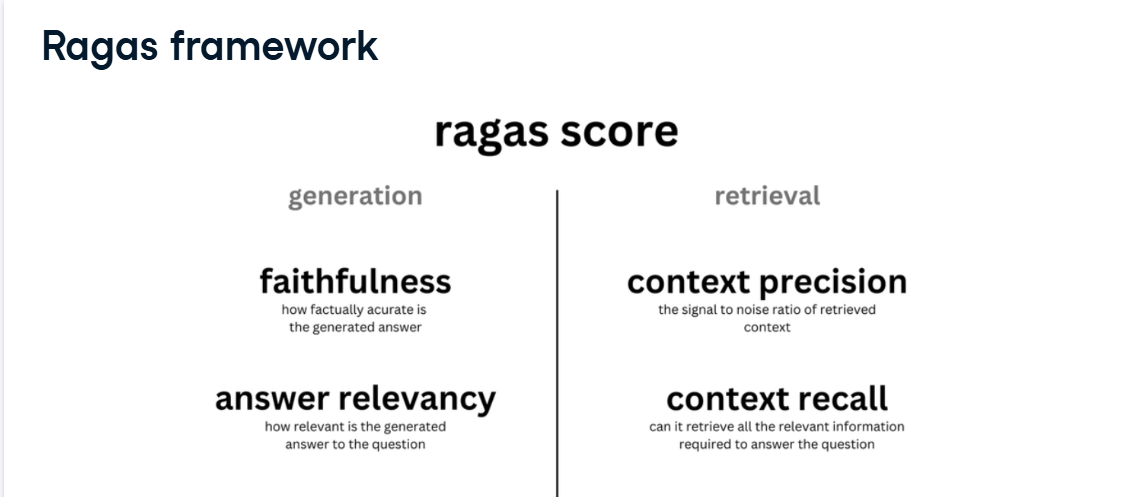
- 